<a href="https://colab.research.google.com/github/diego6289/CAP4630/blob/master/HW_2/HW2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

##Generate random data

In [0]:
# generate m random pairs (x, y)
m = 100
X1 = 2 * np.random.rand(m, 1)
X2 = 3 * np.random.rand(m, 1)
y = 4 + 3 * X1 + 5 * X2 + np.random.rand(m, 1)

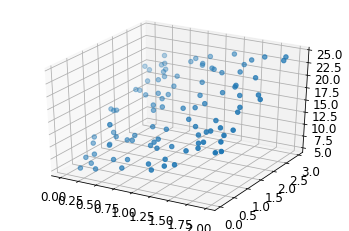

In [86]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X1, X2, y)

In [0]:
# add x0 = 1 
X_b = np.column_stack([np.ones((m, 1)), X1, X2])

In [0]:
# create array with x1=0 and x1=2, x2=0 and x2=3
X1_new = np.array([[0], [2]])
X2_new = np.array([[0], [3]])

# add x0 = 1 to each instance
X_new_b = np.column_stack([np.ones((2, 1)), X1_new, X2_new])

In [0]:
# number of epochs
epochs = 20
# learning rate
lr = 0.01
# fix initial random weight for gradient descent
np.random.seed(42)
initial_weight = np.random.randn(3, 1)

##Linear regression using mini-batch gradient descent with two weights

In [0]:
weight = initial_weight
weight2 = initial_weight
weight_path_mgd = []
batch_size = 4

weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        gradient2 = 1 / batch_size * xi.T.dot(xi.dot(weight2) - yi)
        weight = weight - lr * gradient
        weight2 = weight2 - lr * gradient2
        weight_path_mgd.append(weight)
        weight_path_mgd.append(weight2)

In [100]:
weight_path_mgd

[array([[ 1.52302986e+00],
        [-1.14678908e-03],
        [-7.22067993e-01]]), array([[ 1.63887742],
        [ 0.04881741],
        [-0.52035236]]), array([[ 1.72404507],
        [ 0.07689804],
        [-0.40008227]]), array([[ 1.87225564],
        [ 0.15886184],
        [-0.24811579]]), array([[ 1.97193837],
        [ 0.1987783 ],
        [-0.10742646]]), array([[2.07215171],
        [0.31539769],
        [0.05167748]]), array([[2.16382877],
        [0.43898324],
        [0.17305257]]), array([[2.30582268],
        [0.58233754],
        [0.38554713]]), array([[2.4161716 ],
        [0.68745012],
        [0.59154625]]), array([[2.55058915],
        [0.86814964],
        [0.84846994]]), array([[2.63788019],
        [0.95778482],
        [0.88459672]]), array([[2.7406709 ],
        [1.05277488],
        [1.13684814]]), array([[2.85177274],
        [1.15262478],
        [1.24817969]]), array([[2.92921698],
        [1.25972928],
        [1.36012504]]), array([[3.02797614],
        [1.34